## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
anime=pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
anime.shape

(12294, 7)

In [4]:
# checking the data type
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
# descriptive analysis
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
# checking null values
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### Dataset contains null values so we need to replace them

In [7]:
# genre column - filling null values  with most repeated value in genre column
mode=anime['genre'].mode()
anime['genre'].fillna(mode[0],inplace=True)

In [8]:
# type column - filling null values with most repeated value in type column
mode1=anime['type'].mode()
anime['type'].fillna(mode1[0],inplace=True)

In [9]:
# rating column - filling null values with the mean value in rating column
mean=anime['rating'].mean()
anime['rating'].fillna(mean,inplace=True)

In [10]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
# checking duplicate values
anime.duplicated().any()

False

In [12]:
ratings = pd.DataFrame(anime.groupby('name')['rating'].mean())
ratings.head()

,rating
name,
&quot;0&quot;,5.06
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06
&quot;Bungaku Shoujo&quot; Memoire,7.54
&quot;Bungaku Shoujo&quot; Movie,7.63


In [13]:
ratings['num of ratings'] = pd.DataFrame(anime.groupby('name')['rating'].count())
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,5.06,1
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00,1
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06,1
&quot;Bungaku Shoujo&quot; Memoire,7.54,1
&quot;Bungaku Shoujo&quot; Movie,7.63,1


### Data visualization

<Axes: >

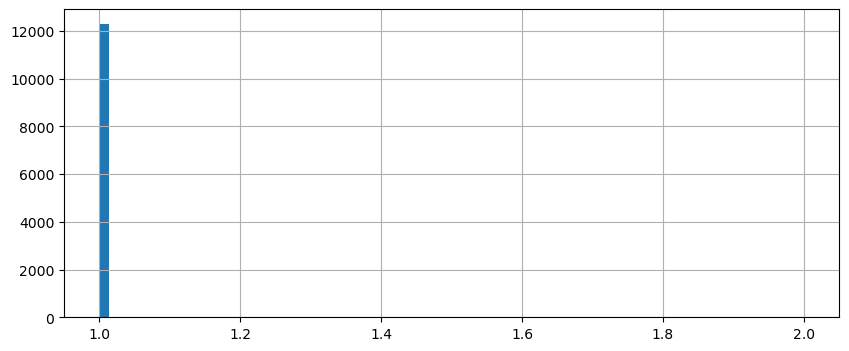

In [14]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

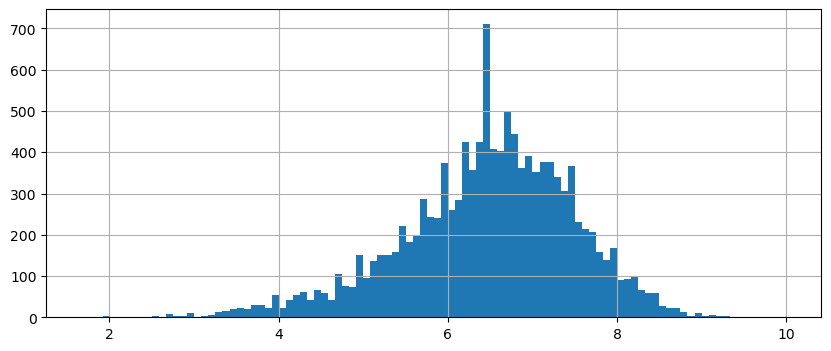

In [16]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=100)

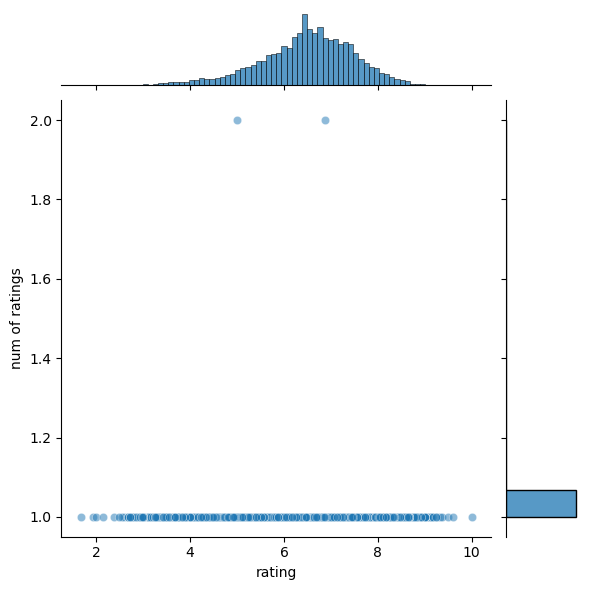

In [17]:
import seaborn as sns
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Text(0.5, 1.0, 'Ratings Frequency')

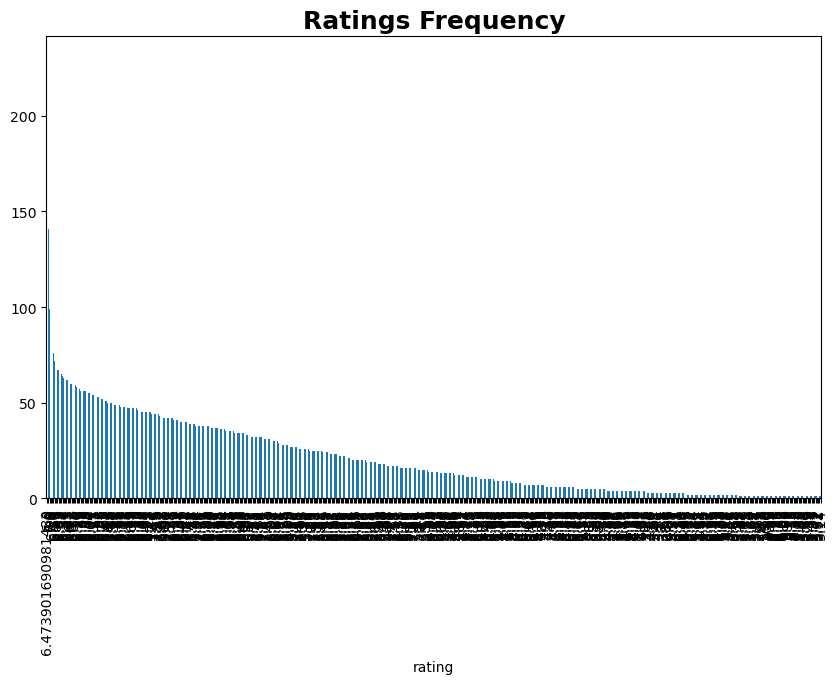

In [18]:
plt.figure(figsize=(10,6))
anime['rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 18, fontweight = 'bold')

## Feature extraction

In [60]:
len(anime.anime_id.unique())

12294

In [62]:
len(anime.name.unique())

12292

In [57]:
# rating counts for perticular anime
anime.groupby('name')['rating'].count().sort_values(ascending=False)

name
Shi Wan Ge Leng Xiaohua       2
Saru Kani Gassen              2
&quot;0&quot;                 1
Otoshidama                    1
Otome Nadeshiko Koi Techou    1
                             ..
Himegoto                      1
Himekishi Angelica            1
Himekishi Lilia               1
Himekishi Olivia              1
◯                             1
Name: rating, Length: 12292, dtype: int64

In [58]:
# mean ratings for all animes
anime.groupby('name')['rating'].mean()

name
&quot;0&quot;                                                       5.060000
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu    5.000000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi                 7.060000
&quot;Bungaku Shoujo&quot; Memoire                                  7.540000
&quot;Bungaku Shoujo&quot; Movie                                    7.630000
                                                                      ...   
xxxHOLiC Rou                                                        8.320000
xxxHOLiC Shunmuki                                                   8.170000
Üks Uks                                                             6.170000
ēlDLIVE                                                             6.473902
◯                                                                   4.220000
Name: rating, Length: 12292, dtype: float64

In [77]:
anime1=anime.pivot_table(index='anime_id',columns='genre',values='rating')

In [78]:
anime1

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
anime1.idxmax()

genre
Action                                                     33082
Action, Adventure                                          33383
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen             377
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports     3101
Action, Adventure, Cars, Sci-Fi                             6162
                                                           ...  
Super Power, Supernatural, Vampire                          1765
Supernatural                                                2366
Thriller                                                   17813
Vampire                                                     3801
Yaoi                                                       33654
Length: 3264, dtype: int64

In [80]:
anime2=anime1.fillna(0,axis=1)

In [81]:
anime2

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
anime_arr=cosine_similarity(anime2)

In [83]:
anime_arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [84]:
np.fill_diagonal(anime_arr,0)
anime_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
anime_new=pd.DataFrame(anime_arr)
anime_new.head()

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
anime_new.index=anime.anime_id.unique()
anime_new.columns=anime.anime_id.unique()

In [74]:
anime_new.head()

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,...,26031,34399,10368,9352,5541,9316,5543,5621,6133,26081
32281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
anime_new.idxmax()[0:10]

32281     8800
5114     32281
28977      868
9253     32281
9969     12413
32935    30296
11061    32281
820      29283
15335      264
15417    32281
dtype: int64

In [88]:
anime[(anime.anime_id==32281)|(anime.anime_id==8800)]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
3456,8800,Senkou no Night Raid Specials,"Action, Historical, Military, Super Power",Special,3,6.99,3667


In [99]:
anime[(anime.anime_id==5114)|(anime.anime_id==32281)]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665


## Recommendation System

In [114]:
def recommend_anime(aid):
    tem = list(anime_new.sort_values([aid],ascending=False).head(10).index)
    
    anime_list=[]
    for i in tem:
        anime_list=anime_list+list(anime[anime['anime_id']==i]['name'])
        recommend=set(anime_list)-set(anime[anime['anime_id']==aid]['name'])
    return recommend

In [115]:
recommend_anime(3456)

{'Asobo Toy-chan',
 'Boku to Gaku: Ano Natsu no Monogatari',
 'Chikyuu Shoujo Arjuna',
 'Gakuen Handsome The Animation',
 'Jinxiu Shenzhou Zhi Qi You Ji',
 'Kushimitama Samurai',
 'Omoikkiri Kagaku Adventure Sou Nanda!',
 'Rokujouma no Shinryakusha!? (TV)',
 'Tanaami Keiichi no Shouzou',
 'Yumemi Douji'}

In [116]:
recommend_anime(5114)

{'Backkom Mission Impossible',
 'Backkom Specials',
 'Backstage Idol Story',
 'Bad Badtz-Maru no Ari to Kirigirisu',
 'Bad Badtz-Maru no Ookami ga Kita!',
 'Bad Badtz-Maru no Ore no Pochi wa Sekaiichi',
 'Bad Badtz-Maru no Ore wa Yuutousei',
 'Bad Badtz-Maru no Otoko Dokyou no Omoiyari',
 'Kimi no Na wa.',
 'Taku Boda'}